# TP 7: Analyse et applications

## 1. Retour sur la méthode de point fixe

On cherche à trouver un point fixe de la fonction $g(x)=e^{-x}$.

1. Tracez la courbe de $g(x)$ ainsi que de la droite d'équation $y=x$ sur $[0,1]$

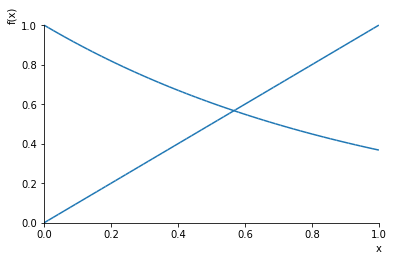

In [3]:
from sympy import *    
x = symbols('x')
g = Lambda(x, E**(-x))
f = Lambda(x,x)
plot(g(x), f(x), (x, 0, 1))

On cherche à appliquer la méthode de point fixe par approximations successives de la suite $(x_n)$ définie par récurrence pour $x_0$ fixé et $x_{n+1}=g(x_n)$ pour une fonction réelle $g$. 

Le nombre de termes de $(x_n)$ à calculer n'est pas connu a priori. Cependant, si l'erreur absolue à l'ordre $k$ est petite par rapport à la tolérance $\epsilon$, on peut arrêter le calcul.

2. Ecrivez une fonction `PtFixe(g,x,e)` en `Sympy` basée sur la récurence définie ci-dessus. Cette fonction prend en entrée la valeur initiale $x$, la fonction $g$ et la tolérance $e$. Elle retourne le réel $x$ qui approche la solution exacte au problème $g(x)=x$.

In [9]:
def PtFixe(g, x, e):
    while abs(g(x) - x) > e : #On cherche g(x) = x jusqu'à notre e défini 
        x = g(x)
    return g(x)

PtFixe(g, 0.5, 0.00001)

0.567140763269807

In [10]:
from sympy import *
x=symbols('x')
f=Lambda(x,E**(-x))
PtFixe(f,0.5,0.00001)

0.567140763269807

3. Tracez la courbe de chaque tolérance en fonction du nombre d'itérations. C'est ce qui permet de mesurer expérimentalement la convergence de la méthode

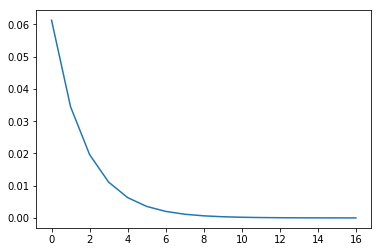

In [11]:
import matplotlib.pyplot as plt

def PtFixe2(g, x, e):
    L=[]
    while abs(g(x) - x) > e: #On cherche g(x) = x jusqu'à notre e défini 
        x = g(x)
        L.append(abs(g(x)-x))  #faire une liste des points
    return L

L = PtFixe2(g, 0.5, 0.00001)
plt.plot(L) #complexité de la fonction

4. Quel est le point fixe de la fonction $g(x)=e^{-x}$? Quelle est la valeur retournée par la fonction `solve` de `Sympy` et comment l'interpréter?

In [12]:
solve(g(x)-x, x) #(e^-x)- x = 0

[LambertW(1)]

## 2. Méthode de la sécante

### 2.1 Motivation

Dans la figure ci-dessous, avec la méthode de la recherche dichotomique, l'approximation à l'étape suivante est $r\in [\frac{a+b}{2},b]$

![](secante.png)

La méthode de la recherche dichotomique est lente. On cherche une méthode qui améliorerait la convergence vers la racine $r$. Une des méthodes consiste à prendre comme approximation à l'étape suivante $r\in [x_1,b]$ pour $x_1$ l'abcisse de l'intersection de la sécante avec l'axe des $x$.

## 2.2 Description de la méthode

Pour une fonction $f$ définie sur un intervalle $[a,b]$ et telle que $f(a)\cdot f(b)<0$, l'idée est de remplacer localement la fonction $f$ par la droite qui passe par les deux points $(a,f(a))$ et $(b,f(b))$. La "méthode de la sécante" est aussi appelée *regula falsi*.

1. Ecrivez l'équation de la droite, appelée sécante, qui passe par les deux points $(a,f(a))$ et $(b,f(b))$ de façon symbolique (i.e. en fonction de $f$, $a$ et $b$). Autrement dit, on cherche symboliquement une équation réduite de droite de la forme $y=m.x+p$, donc les valeurs de la pente $m$ et de $p$, l'ordonnée à l'origine.

In [13]:
a, b = symbols('a,b')
f = Function('f')
m = (f(b)-f(a))/(b-a)  # pente de la fonction  
p = f(a) - m * a  # ordonnée à l'origine 

droite = m*x+p
droite

-a*(-f(a) + f(b))/(-a + b) + x*(-f(a) + f(b))/(-a + b) + f(a)

2. Etablissez la formule d'itération de la méthode de la sécante : la première approximation $x_1$ d'un zéro de $f$ est $$x_1=\frac{a.f(b)-b.f(a)}{f(b)-f(a)}$$
Cette formule est obtenue en calculant symboliquement l'intersection de la sécante avec l'axe des abcisses:

In [14]:
solve(droite, x) #droite = 0 

[(-a*f(b) + b*f(a))/(f(a) - f(b))]

3. Ecrivez la fonction `secante(f,a,b)` en `Sympy` qui renvoie la valeur de la sécante de $f$ sur $[a,b]$. Celle-ci vous aidera à trouver les approximations successives, par exemple:

In [6]:
def secante(f, a, b):
    res = (a*f(b) - b*f(a))/f(b)-f(a) #return (a*f(b) - b*f(a))/f(b)-f(a)
    return res

secante(f, 2, 3)

-2.0

In [9]:
x1=secante(f,2,3) 
x1

-2.0

4. Expliquez comment on choisit l'intervalle suivant: $[a,x_1]$ ou $[x_1,b]$ ?

In [17]:
si f(a)*f(x) < 0 : 
    [a, x1]   #on prend la première partie de l'intervalle
sinon : 
    [x1, b]   #sinon la deuxième

SyntaxError: invalid syntax (<ipython-input-17-b64d3f97c2ef>, line 1)

5. Appliquez (en utilisant `Sympy`pour faire vos calculs) la méthode sur la fonction $$f(x)=\frac{x-sin(x)}{2\pi}-0,3$$

In [22]:
import sympy as sy
f(2)*f(x1).evalf(6)


In [14]:
#import sympy as sy 
#x = sy.symbols('x')
#a = sy.symbols('a')
#b = sy.symbols('b') on définit les variables 

f = sy.Lambda(x, (x - sin(x))/(2*pi) - 0.3) # f = sy.Lambda([x],(x - sy.sin(x))/(2*pi) - 0.3)

secante(f, a, b)

NameError: name 'a' is not defined

5.1 Affichez tout d'abord le graphe de la fonction $f$ sur $[0,6]$

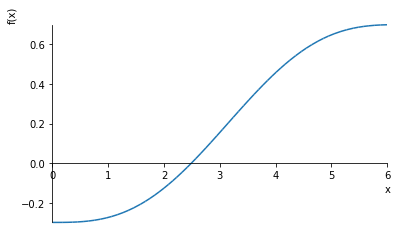

In [42]:
plot(f(x),(x,0,6))

5.2 Utilisez `Sympy` pour définir une fonction d'itération `succ` qui, pour une fonction $f$ et à un intervalle donné $[a_k,b_k]$, fait correspondre l'intervalle emboité suivant $[a_{k+1},b_{k+1}]$. Plus précisément, la fonction `succ(f,a,b)`, appliquée à un intervalle contenant un zéro de la fonction $f$, donne un nouvel intervalle qui est emboité dans l'intervalle donné et qui contient un zéro de $f$. Ce nouvel intervalle est donné par la méthode de la sécante. Autrement dit, la fonction `succ` (comme "successeur de l'intervalle") réalise une itération de la méthode de la sécante.

In [19]:
def succ(f,a,b) :
    x1=N(secante(f,a,b))
    
    if f(a)*f(x1) <0 : 
        intervalle = [a,x1] #nouvel intervalle pour [ak+1,bk+1] 
    else:
        intervalle = [x1,b]
    return intervalle

succ(f,2,3)  #Il fallait définir a,x et b en Sympy en important de la librairie sympy pour que la fonction fonctionne.

[2, 4.57296372625051]

In [18]:
succ(f,2,3)
plot(f(x),(x,0,6))

NameError: name 'succ' is not defined

5.3 Utilisez la fonction `succ` précédente pour itérer la méthode $n$ fois (et appliquez pour $n=5$ sur l'intervalle $[a,b]$. Ecrivez la fonction `itere(n,a,b)` qui itère $n$ fois `succ` sur l'intervalle $[a,b]$ qui contient la racine

In [17]:
def itere(f, n, a, b):
    for i in range(n):
        s = succ(f, a, b)
        (a, b) = s   #affectation parallèle
    return s

itere(f, 5, 2, 3)

NameError: name 'succ' is not defined

In [16]:
def itere2(n) : 
    g = f 
    a = 2 
    b = 3
    for i in range(n):
        s = succ(f, a, b)
        (a, b) = s   #affectation parallèle
    return s

In [63]:
itere(f,5,2,3)

6. Comparez le résultat avec la méthode de résolution de `Sympy`

In [25]:
solve(f(x), x)
#Sympy ne connait pas la réponse et donne une erreur.

SympifyError: SympifyError: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]

7. (Facultatif) Comparez la vitesse de convergence de la méthode de la sécante avec celle de la dichotomie sur la fonction donnée en application.

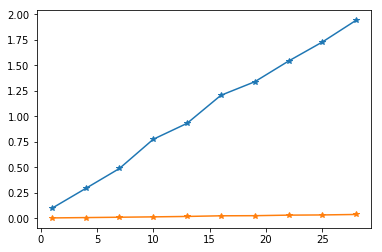

In [38]:
import timeit
from functools import partial
import matplotlib.pyplot as plt

x,y=[],[]
for n in range(1,30,3):
     testTimer=timeit.Timer(partial(itere2,n))
     t=testTimer.timeit(number=10)
     x.append(n)
     y.append(t)
    


x,z=[],[]
for n in range(1,30,3):
     testTimer=timeit.Timer(partial(dico,n))
     t=testTimer.timeit(number=10)
     x.append(n)
     z.append(t)
    
plt.plot(x,y,marker='*',label="iter") 
plt.plot(x,z,marker='*',label="dico") 


In [27]:
def dico(n) : 
    
    a = 2
    b =3 
    x=(a+b)/2
    aa,bb,sol,e=a,b,0,0
    g = f
    for i in range(n) : 
        if sign(g(x))==0:
            sol=x
        elif sign(g(x))==sign(g(aa)): 
            aa=x
        elif sign(g(x))==sign(g(bb)):
            bb=x
            x=(aa+bb)/2
            e=e+1
            sol=x
    return((e,sol))
           
        
dico(3)    

(1, 2.25)